In [1]:
from google.colab import drive #mount colab on your google drive file created in colab notebook folder 
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
#create folder named as text masking in colab notebook then put your image and code there as well as 'east'  which download by below command
cd '/gdrive/My Drive/Colab Notebooks/text masking' 

/gdrive/My Drive/Colab Notebooks/text masking


In [0]:
!wget https://raw.githubusercontent.com/oyyd/frozen_east_text_detection.pb/master/frozen_east_text_detection.pb

--2020-01-18 08:39:11--  https://raw.githubusercontent.com/oyyd/frozen_east_text_detection.pb/master/frozen_east_text_detection.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96662756 (92M) [application/octet-stream]
Saving to: ‘frozen_east_text_detection.pb.1’

frozen_east_text_de 100%[===================>]  92.18M  83.5MB/s    in 1.1s    

2020-01-18 08:39:14 (83.5 MB/s) - ‘frozen_east_text_detection.pb.1’ saved [96662756/96662756]



In [3]:
!pip install Pillow
!pip install imutils
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (26.3 MB/s)
debconf: unable to initial

In [0]:
!unzip 'aadhaar3 input.zip'

Archive:  aadhaar3 input.zip
   creating: aadhaar3 input/
  inflating: __MACOSX/._aadhaar3 input  
  inflating: aadhaar3 input/Capture38.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture38.PNG  
  inflating: aadhaar3 input/Capture39.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture39.PNG  
  inflating: aadhaar3 input/Capture43.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture43.PNG  
  inflating: aadhaar3 input/Capture42.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture42.PNG  
  inflating: aadhaar3 input/Capture40.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture40.PNG  
  inflating: aadhaar3 input/Capture41.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture41.PNG  
  inflating: aadhaar3 input/Capture45.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture45.PNG  
  inflating: aadhaar3 input/Capture44.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture44.PNG  
  inflating: aadhaar3 input/Capture34.PNG  
  inflating: __MACOSX/aadhaar3 input/._Capture34.PNG  
  inflatin

In [0]:
from imutils.object_detection import non_max_suppression
import numpy as np
import pytesseract
import argparse
import cv2
import imutils



from google.colab.patches import cv2_imshow # uncomment this line for using colab
def mask(path):

  image=cv2.imread(path)
  def rotate2(image,count=0):
    
    try:
        text = pytesseract.image_to_osd(image)
    except:
        text = None
    
    #print(text)
    if text is not None and count<4:
        text = text.split('\n')
        text = text[2].split(':')
        rotate = int(text[1].strip())
        
        if rotate==90:
            image = cv2.rotate(image, rotateCode=cv2.ROTATE_90_CLOCKWISE)
        elif rotate==270:
            image = cv2.rotate(image, rotateCode=cv2.ROTATE_90_COUNTERCLOCKWISE)
        elif rotate==180:
            image = cv2.rotate(image, rotateCode=cv2.ROTATE_180)
    elif text is None and count<4:
      count=count+1
      image = cv2.rotate(image, rotateCode=cv2.ROTATE_90_CLOCKWISE)
      image=rotate2(image,count)
    return image
  image=rotate2(image)


  def decode_predictions(scores, geometry):
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []

    for y in range(0, numRows):
      scoresData = scores[0, 0, y]
      xData0 = geometry[0, 0, y]
      xData1 = geometry[0, 1, y]
      xData2 = geometry[0, 2, y]
      xData3 = geometry[0, 3, y]
      anglesData = geometry[0, 4, y]

      for x in range(0, numCols):
        
        if scoresData[x] < 0.5:
          continue
  

        (offsetX, offsetY) = (x * 4.0, y * 4.0)
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)
  
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]
  
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)
  

        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])
  

    return (rects, confidences)

  orig = image.copy()
  (origH, origW) = image.shape[:2]


  (newW, newH) = (int(origW/32)*32, int(origH/32)*32)
  rW = origW / float(newW)
  rH = origH / float(newH)

  image = cv2.resize(image, (newW, newH))
  (H, W) = image.shape[:2]

  layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]
  net = cv2.dnn.readNet('frozen_east_text_detection.pb')

  blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    (123.68, 116.78, 103.94), swapRB=True, crop=False)
  net.setInput(blob)
  (scores, geometry) = net.forward(layerNames)

  (rects, confidences) = decode_predictions(scores, geometry)
  boxes = non_max_suppression(np.array(rects), probs=confidences)


  results = []

  for (startX, startY, endX, endY) in boxes:

    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)


    dX = int((endX - startX) *.1)
    dY = int((endY - startY) *.1)


    startX = max(0, startX - dX)
    startY = max(0, startY - dY)
    endX = min(origW, endX + (dX * 2))
    endY = min(origH, endY + (dY * 2))


    roi = orig[startY:endY, startX:endX]

    config = ("-l eng --oem 1 --psm 7")
    text = pytesseract.image_to_string(roi, config=config)
    

    results.append(((startX, startY, endX, endY), text))
    




  results = sorted(results, key=lambda r:r[0][1])
  output = orig.copy() 


  for ((startX, startY, endX, endY), text) in results:
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()



      

    numbers = sum(c.isdigit() for c in text)
    if (numbers>3 and numbers<6) and len(text)<8 and startY>int(newH/2) and startY<int(newH-newH/25) and newH<newW:


      cv2.rectangle(output, (startX, startY), (endX, endY),(255, 255, 255), -1)

    elif (numbers>2 and numbers<6) and len(text)<8 and startY>int(newH/2) and startY<int(newH-newH/25) and newH>newW:
      cv2.rectangle(output, (startX, startY), (endX, endY),(255, 255, 255), -1)



  #cv2.imshow(output) #comment this line for colab
  cv2_imshow(output) 
  return output


In [5]:
!unzip 'aadhaar_4.zip'

Archive:  aadhaar_4.zip
  inflating: aadhaar_4/Capture46.PNG  
  inflating: aadhaar_4/Capture47.PNG  
  inflating: aadhaar_4/Capture48.PNG  
  inflating: aadhaar_4/Capture49.PNG  
  inflating: aadhaar_4/Capture50.PNG  
  inflating: aadhaar_4/Capture51.PNG  


In [6]:
import glob
img=glob.glob("aadhaar_4/*.PNG")
for i,path in enumerate(img):
  rr=mask(path)
  path='aadhaar4/'+str(i)+'.PNG'
  cv2.imwrite(path,rr)

Output hidden; open in https://colab.research.google.com to view.

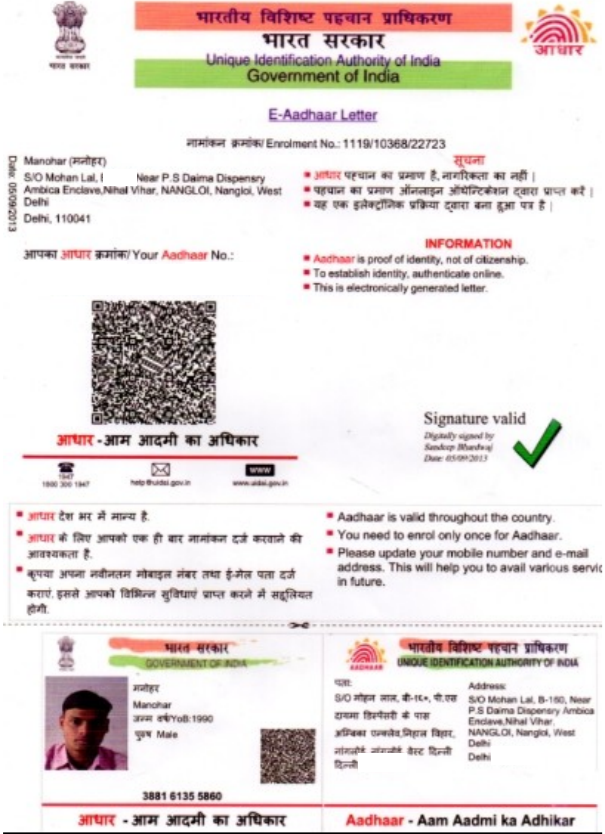

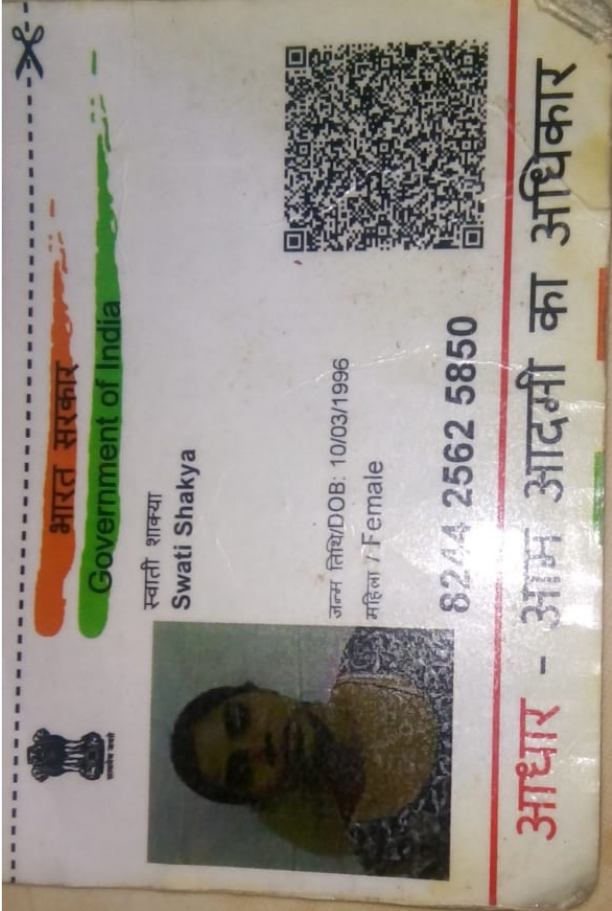

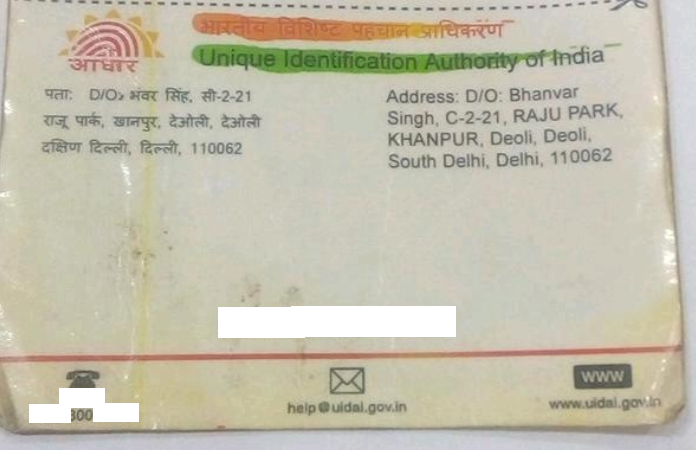

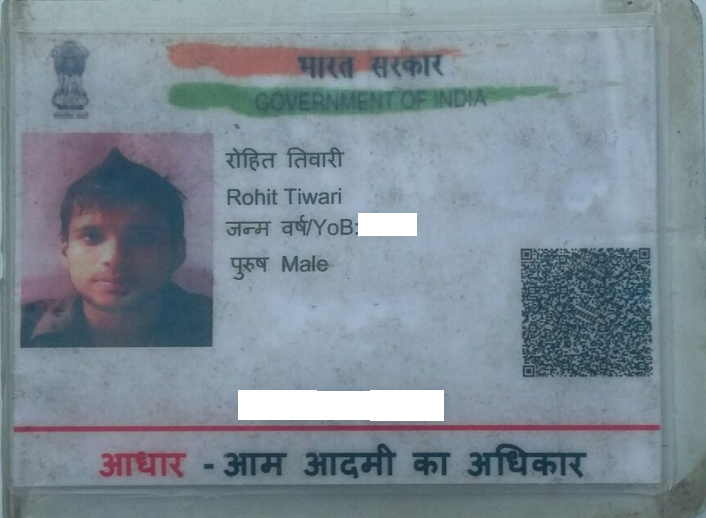

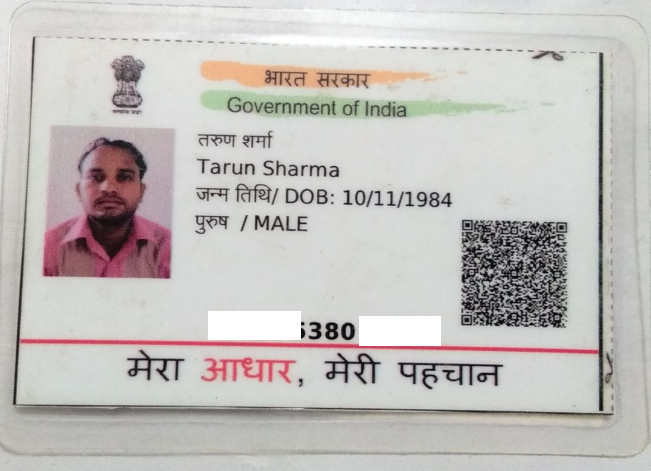

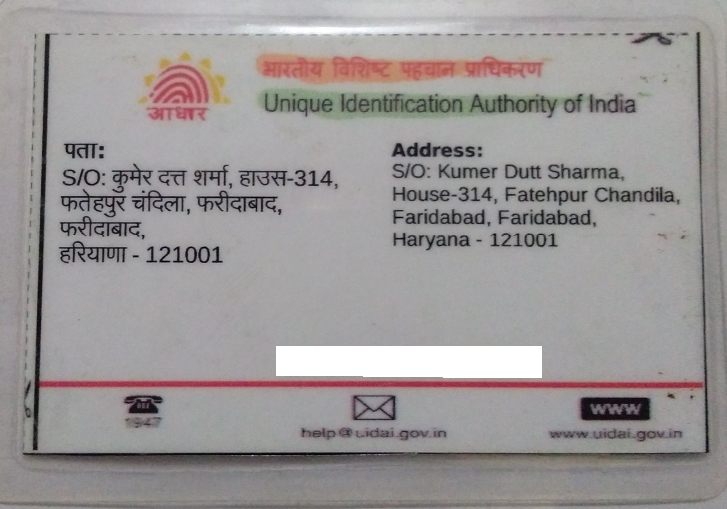

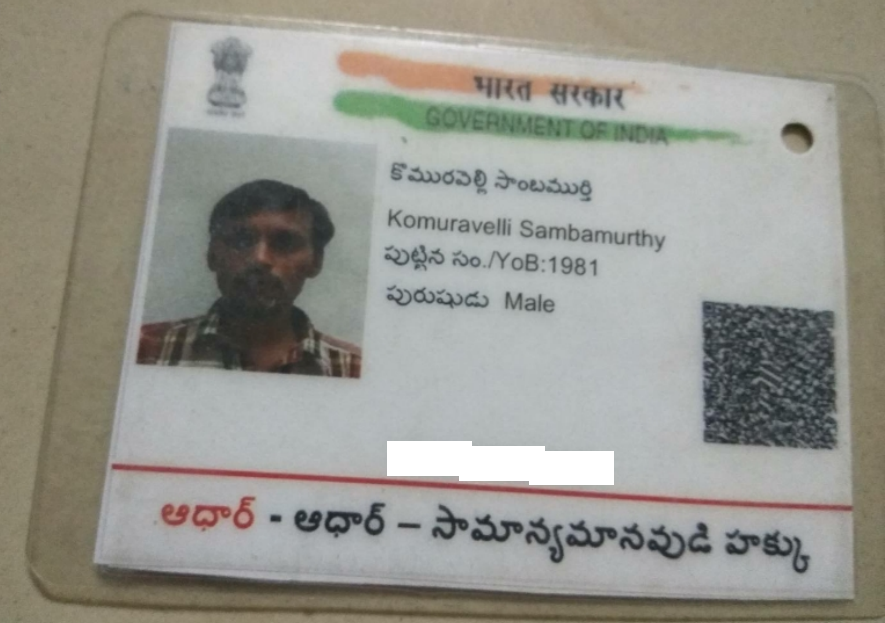

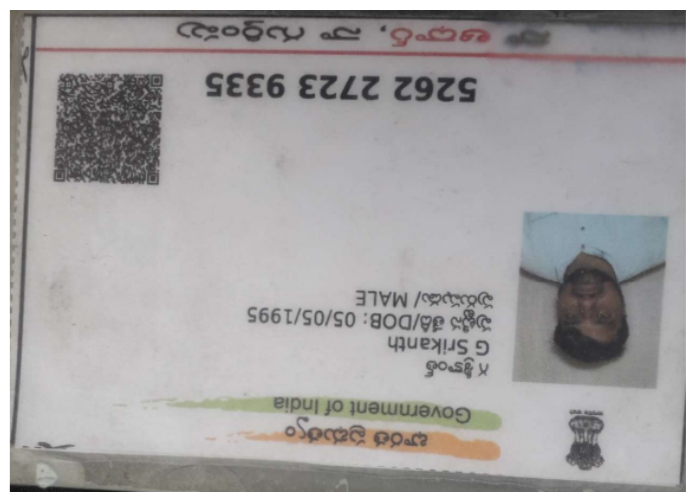

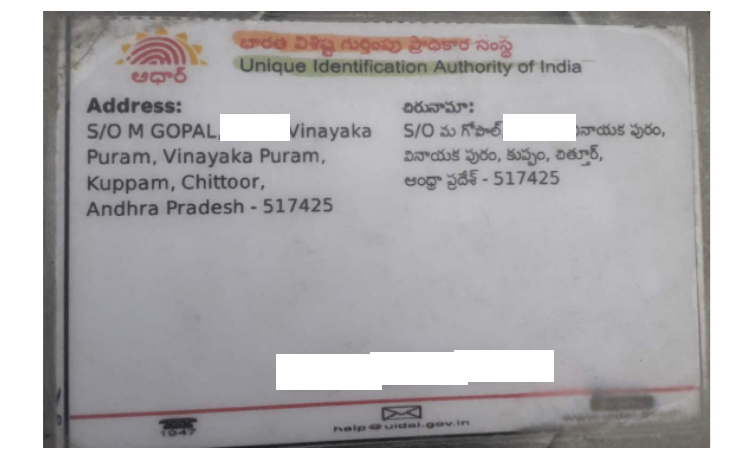

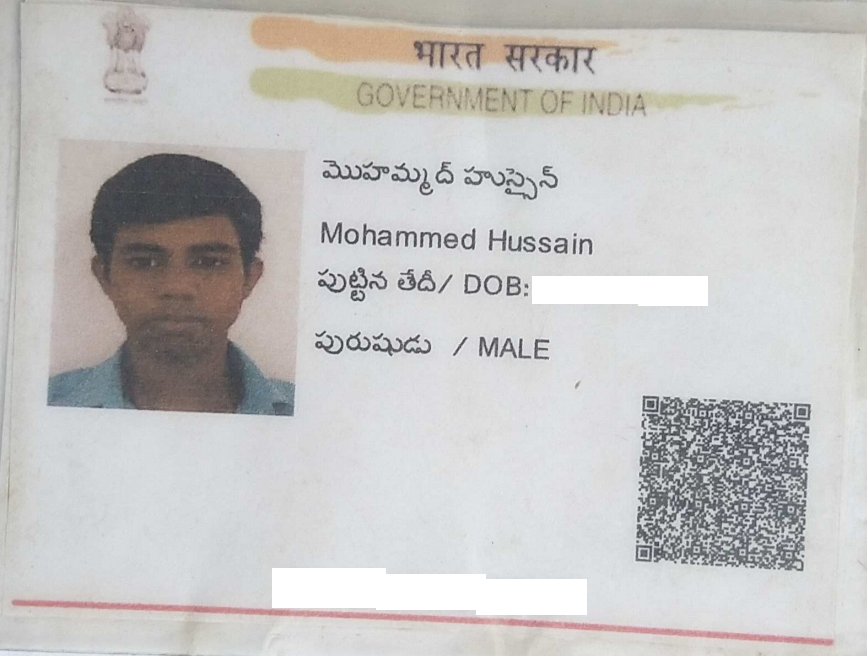

In [0]:
import glob
img=glob.glob("pics/*.PNG")
for i,path in enumerate(img):
  rr=mask(path)
  path='pics2/'+str(i)+'.jpg'
  cv2.imwrite(path,rr)